## <center> **Анализ результатов A/B-тестирования**

Компания планирует запустить новую акцию, чтобы продать как можно больше туров. Команда разработала два варианта посадочной страницы официального сайта компании и провела A/B-тестирование. Собранные в результате проведения эксперимента данные вы можете найти здесь.

Вам предстоит решить настоящую бизнес-задачу: проанализировать эффективность обоих вариантов посадочной страницы сразу по двум критериям: конверсии покупки и среднему чеку. На основе проведенного анализа вам будет необходимо сделать выводы и принять решение: какой из вариантов дизайна более предпочтительный.

Итак, наша фирма предлагает следующие варианты туров и их соответствующие стоимости:
* Таиланд — 100000 рублей;
* Турция — 60000 рублей;
* Мальдивы — 200000 рублей;
* Санкт-Петербург — 10000 рублей;
* Камчатка — 150000 рублей.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import ttest_ind, shapiro, f_oneway, mannwhitneyu
from statsmodels.stats.proportion import proportions_ztest

Прочитаем наши данные и посмотрим на столбцы таблицы:

In [8]:
data = pd.read_csv('data/ab_data_tourist.csv')
data.head()

,user_id,date,group,purchase,price
0,851104,2021-01-21,A,0,0
1,804228,2021-01-12,A,0,0
2,661590,2021-01-11,B,0,0
3,853541,2021-01-08,B,0,0
4,864975,2021-01-21,A,1,150000


## **Задание 7.1.**

Начнем с исследования структуры наших данных. С помощью метода info() выведите информацию о типах данных и количестве непустых значений. Какой тип данных имеет столбец date?

In [9]:
# ваш код здесь
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   user_id   294478 non-null  int64 
 1   date      294478 non-null  object
 2   group     294478 non-null  object
 3   purchase  294478 non-null  int64 
 4   price     294478 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 11.2+ MB


## **Задание 7.2.**

Приведите столбец date к типу данных datetime. Убедитесь в равной длительности проведения тестирования для каждой из группы. Для этого сгруппируйте данные по признаку группы и определите первую и последнюю дату наблюдения для каждой из групп. 

В какой промежуток времени проводился A/B-тест?


In [ ]:
# ваш код здесь
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')

In [37]:
a_data = data[data['group'] == 'A'].sort_values(['date'])
a_data

,user_id,date,group,purchase,price
218060,907943,2021-01-02,A,0,0
176113,925962,2021-01-02,A,0,0
110214,817658,2021-01-02,A,0,0
28530,848296,2021-01-02,A,0,0
19123,850071,2021-01-02,A,0,0
...,...,...,...,...,...
217916,902305,2021-01-24,A,0,0
105767,874298,2021-01-24,A,0,0
43370,749018,2021-01-24,A,0,0
43217,832731,2021-01-24,A,0,0


In [38]:
b_data = data[data['group'] == 'B'].sort_values(['date'])
b_data

,user_id,date,group,purchase,price
232334,764384,2021-01-02,B,0,0
228431,691863,2021-01-02,B,0,0
80861,899593,2021-01-02,B,0,0
153829,692030,2021-01-02,B,0,0
285243,690292,2021-01-02,B,1,10000
...,...,...,...,...,...
82270,933414,2021-01-24,B,0,0
73734,866704,2021-01-24,B,0,0
206277,808307,2021-01-24,B,0,0
73748,909479,2021-01-24,B,0,0


## **Задание 7.3.**

* Чему равно количество посещений сайта в группах А и B?

* Чему равно суммарное количество покупок в группах А и B?

* Чему равна сумма всех покупок в группах А и B? Ответ приведите в миллионах рублей. Например, 185.52 млн. руб.

In [39]:
# ваш код здесь
# Чему равно количество посещений сайта в группах А и B?
print('Количество посещений сайта в группе А {}'.format(a_data.shape[0]))
print('Количество посещений сайта в группе B {}'.format(b_data.shape[0]))

Количество посещений сайта в группе А 147202
Количество посещений сайта в группе B 147276


In [40]:
# Чему равно суммарное количество покупок в группах А и B?
print('суммарное количество покупок в группе А {}'.format(a_data['purchase'].sum()))
print('суммарное количество покупок в группе B {}'.format(b_data['purchase'].sum()))

суммарное количество покупок в группе А 17723
суммарное количество покупок в группе B 17514


In [41]:
# Чему равна сумма всех покупок в группах А и B? Ответ приведите в миллионах рублей. Например, 185.52 млн. руб.
print('сумма всех покупок в группе А {}'.format(a_data['price'].sum() / 1000000 ))
print('сумма всех покупок в группе B {}'.format(b_data['price'].sum() / 1000000 ))

сумма всех покупок в группе А 1436.26
сумма всех покупок в группе B 1554.1


## **Задание 7.4.**

Проверьте, есть ли пользователи, которые в процессе A/B-теста попали в обе тестовые группы? Если да, то сколько таких уникальных пользователей, если нет - введите в поле для ответа 0?

**Подсказка:**

*Создайте множество пользователей группы А и множество пользователей группы B. Пересеките два этих множества (операция intersection) и вычислите количество элементов в полученном множестве.*


In [52]:
# ваш код здесь
users_a = a_data['user_id'].unique()
users_b = b_data['user_id'].unique()

In [45]:
import numpy as np

In [58]:
# находим пересечение двух массивов и вычисляем его размер
user_intersection = np.intersect1d(users_a, users_b)
user_intersection.shape[0]

1895

## **Исключите пользователей, оказавшихся в обеих группах**

Так как мы не можем определить, какая из версий сайта повлияла на принятие решения, исключим этих пользователей. Далее мы будем работать только с очищенными от пересечений данными.

Возможный вариант исключения пользователей:

In [95]:
updated_data = data[data['user_id'].apply(lambda x: x not in user_intersection)]

Где user_intersection - множество пересечений пользователей групп А и B.

In [191]:
updated_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290688 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   user_id   290688 non-null  int64         
 1   date      290688 non-null  datetime64[ns]
 2   group     290688 non-null  object        
 3   purchase  290688 non-null  int64         
 4   price     290688 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 13.3+ MB


## **Задание 7.5.**

Для первичного анализа результатов A/B-тестирования нам понадобится таблица следующего вида:

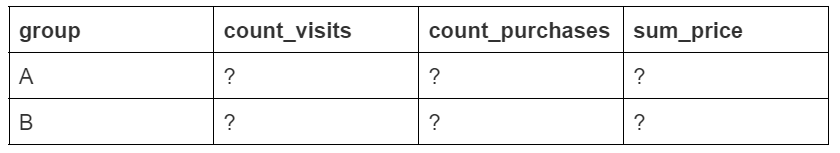
 
 
Для того, чтобы получить такую таблицу, сгруппируйте данные по признаку группы. В каждой группе рассчитайте следующие показатели:
* количество посещений (количество пользователей)
* количество совершенных покупок
* сумма всех покупок в группе

В полученной сгруппированной таблице переименуйте столбцы на **count_visits, count_purchases и sum_price**.

**Подсказка:**

*Для переименования столбцов можно использовать метод rename() с параметром columns, в который передается словарь. Ключи этого словаря - старые имена столбцов, а значения - новые.*

Чему на этот раз равно количество посещений сайта в группах А и B?


In [192]:
# ваш код здесь
summary_data = updated_data.groupby(['group']).agg({
    'user_id':'count',
    'purchase':'sum',
    'price':'sum'
    }).rename(columns={
        'user_id':'count_visits',
        'purchase':'count_purchases',
        'price':'sum_price'
        })
summary_data

,count_visits,count_purchases,sum_price
group,,,
A,145307,17487,1417780000
B,145381,17290,1533010000


Приведите промежуточные выводы по построенной таблице. Сопоставимо ли количество посещений обоих вариантов посадочной странице, можно ли говорить о сбалансированности выборок?

Количество посещений в группах А и B сопоставимо. Выборки сбалансированы.

## **Задание 7.6.**

Добавьте в сгруппированную таблицу столбцы conversion - конверсия покупки (отношение количества покупок к количеству посещений сайта в каждой группе, выраженное в процентах) и mean_check - средний чек (отношение суммы покупок к количеству покупок в каждой группе).

* Чему равна конверсия в группах? Ответ приведите в процентах и округлите до сотых. Например, 75.12 %
* Чему равен средний чек в группах? Ответ приведите в рублях и округлите до целых. Например, 120519 рублей.

In [193]:
# ваш код здесь
summary_data['conversion'] = summary_data['count_purchases'] / summary_data['count_visits'] * 100
summary_data['mean_check'] = summary_data['sum_price'] / summary_data['count_purchases']
print(round(summary_data['conversion'],2))
print(round(summary_data['mean_check']))

group
A    12.03
B    11.89
Name: conversion, dtype: float64
group
A    81076.0
B    88665.0
Name: mean_check, dtype: float64


Приведите промежуточные выводы по таблице. По какому(им) показателю(ям) вариант А эффективнее варианта B и наоборот?

По показателю конверсии эффективнее выглядит группа А. Но по среднему чеку группа B опережает группу А.

## **Задание 7.7.**

Теперь давайте сравним варианты по покупательской способности туров. Для этого постройте сводную таблицу, которая покажет зависимость количества продаж от группы и цены тура. 

In [97]:
# отфильтруем записи с покупками
purchase_data = updated_data[updated_data['purchase'] == 1]

In [98]:
# строим сводную таблицу зависимости количества продаж от группы и цены тура
summary_tour_data = purchase_data[purchase_data['group'] == 'A'].groupby('price').agg({'user_id':'count'}).rename(columns={'user_id':'count_purchase_a'})
summary_tour_data = summary_tour_data.join( purchase_data[purchase_data['group'] == 'B'].groupby('price').agg({'user_id':'count'}).rename(columns={'user_id':'count_purchase_b'}) )
display(summary_tour_data)

,count_purchase_a,count_purchase_b
price,,
10000,5182,5201
60000,5271,1730
100000,1832,5227
150000,3478,3438
200000,1724,1694


Визуализируйте полученную сводную таблицу с помощью тепловой карты с аннотацией. 
Чему равно количество проданных туров за 60000 рублей в группах?

<AxesSubplot:ylabel='price'>

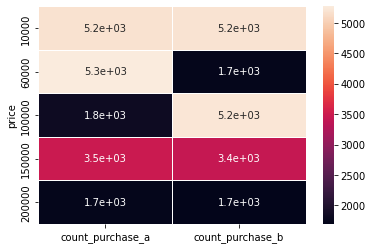

In [99]:
# ваш код здесь
sns.heatmap(summary_tour_data, annot=True, linewidths=.5)

Сделайте выводы по построенной таблице. По каким турам покупательская способность участников группы А выше, чем участников группы B и наоборот?

По турам в Турцию (60тр) покупательная способность группы А значительно выше группы B. По турам же в Тайланд (100тр) наоборот покупательная способность группы B значительно выше группы A.

## **Задание 7.8.**

Настало время поговорить о стабилизации кумулятивных метрик во времени. Но прежде, чем перейти к кумулятивным метрикам, нам необходимо построить таблицу с ежедневными данными результатов проведения A/B-тестирования.

Сгруппируйте данные по дате и группе тестирования. В каждой группе вычислите количество посещений страницы, количество покупок и сумму покупок. 

Добавьте в таблицу информацию о ежедневной конверсии (ежедневное количество покупок / ежедневное количество посещений) в группе и ежедневном среднем чеке (ежедневная сумма покупок / ежедневное количество покупок)
* Чему равна конверсия 3 января 2021 года? Ответ приведите в процентах и округлите до сотых.

* Чему равен средний чек 3 января 2021 года? Ответ приведите в рублях и округлите до целого.

In [194]:
# Сгруппируйте данные по дате и группе тестирования. В каждой группе вычислите количество посещений страницы, количество покупок и сумму покупок. 
summary_daily_data = updated_data.groupby(['group','date']).agg({
    'user_id':'count',
    'purchase':'sum',
    'price':'sum'
    }).rename(columns={
        'user_id':'count_visit',
        'purchase':'count_purchase',
        'price':'sum_purchase'}).reset_index()

In [195]:
# Добавьте в таблицу информацию о ежедневной конверсии (ежедневное количество покупок / ежедневное количество посещений) в группе и ежедневном среднем чеке (ежедневная сумма покупок / ежедневное количество покупок)
summary_daily_data['conversion'] = summary_daily_data['count_purchase'] / summary_daily_data['count_visit'] * 100
summary_daily_data['avg_daily_check'] = summary_daily_data['sum_purchase'] / summary_daily_data['count_purchase']

In [116]:
summary_daily_data.head()

,group,date,count_visit,count_purchase,sum_purchase,conversion,avg_daily_check
0,A,2021-01-02,2854,359,29410000,12.578837,81922.005571
1,A,2021-01-03,6596,748,62000000,11.340206,82887.700535
2,A,2021-01-04,6566,799,64250000,12.168748,80413.016270
3,A,2021-01-05,6433,790,64550000,12.280429,81708.860759
4,A,2021-01-06,6606,764,63410000,11.565244,82997.382199


In [196]:
# Чему равна конверсия 3 января 2021 года? Ответ приведите в процентах и округлите до сотых.
round(summary_daily_data[['group','conversion']].loc[summary_daily_data['date'] =='2021-01-03'],2)

,group,conversion
1,A,11.34
24,B,11.39


In [122]:
# Чему равен средний чек 3 января 2021 года? Ответ приведите в рублях и округлите до целого.
round(summary_daily_data[['group','avg_daily_check']].loc[summary_daily_data['date'] =='2021-01-03'])

,group,avg_daily_check
1,A,82888.0
24,B,87480.0


## **Задание 7.9.** 

Добавьте в таблицу с ежедневными показателями кумулятивные признаки:
* кумулятивное количество посещений страницы
* кумулятивное количество покупок
* кумулятивную сумму покупок

Не забудьте при расчете кумулятивной суммы сгруппировать данные по группам. 

Вычислите кумулятивную конверсию и кумулятивный средний чек на основе полученных кумулятивных показателей. 

* Какая **кумулятивная** конверсия была в группе B на 20 января? Ответ приведите в процентах, округлив до сотых.
* Какой **кумулятивный** средний чек был в группе А на 12 января 2021 года? Ответ приведите в рублях, округлив до целых.

In [130]:
# ваш код здесь
# вычисляем кумулятивное количество посещений страницы
summary_daily_data['cum_count_visit'] = summary_daily_data.groupby('group')['count_visit'].cumsum()
# вычисляем кумулятивное количество покупок
summary_daily_data['cum_count_purchase'] = summary_daily_data.groupby('group')['count_purchase'].cumsum()
# вычисляем кумулятивную сумму покупок
summary_daily_data['cum_sum_purchase'] = summary_daily_data.groupby('group')['sum_purchase'].cumsum()
# вычисляем кумулятивную конверсию и кумулятивный средний чек на основе полученных кумулятивных показателей.
# summary_daily_data['cum_conversion'] = summary_daily_data.groupby('group')['conversion'].cumsum()
# summary_daily_data['cum_avg_daily_check'] = summary_daily_data.groupby('group')['avg_daily_check'].cumsum()
summary_daily_data['cum_conversion'] = summary_daily_data['cum_count_purchase'] / summary_daily_data['cum_count_visit'] * 100
summary_daily_data['cum_avg_daily_check'] = summary_daily_data['cum_sum_purchase'] / summary_daily_data['cum_count_purchase']
summary_daily_data.head()

,group,date,count_visit,count_purchase,sum_purchase,conversion,avg_daily_check,cum_count_visit,cum_count_purchase,cum_sum_purchase,cum_conversion,cum_avg_daily_check
0,A,2021-01-02,2854,359,29410000,12.578837,81922.005571,2854,359,29410000,12.578837,81922.005571
1,A,2021-01-03,6596,748,62000000,11.340206,82887.700535,9450,1107,91410000,11.714286,82574.525745
2,A,2021-01-04,6566,799,64250000,12.168748,80413.016270,16016,1906,155660000,11.900599,81668.415530
3,A,2021-01-05,6433,790,64550000,12.280429,81708.860759,22449,2696,220210000,12.009444,81680.267062
4,A,2021-01-06,6606,764,63410000,11.565244,82997.382199,29055,3460,283620000,11.908449,81971.098266


In [131]:
# Какая кумулятивная конверсия была в группе B на 20 января 2021 года? Ответ приведите в процентах, округлив до сотых.
round(summary_daily_data[['group','cum_conversion']].loc[summary_daily_data['date'] =='2021-01-20'],2)

,group,cum_conversion
18,A,11.98
41,B,11.90


In [132]:
# Какой кумулятивный средний чек был в группе А на 12 января 2021 года? Ответ приведите в рублях, округлив до целых.
round(summary_daily_data[['group','cum_avg_daily_check']].loc[summary_daily_data['date'] =='2021-01-12'])

,group,cum_avg_daily_check
10,A,81492.0
33,B,88352.0


Постройте кумулятивные графики конверсии и среднего чека в каждой группе по дням. Сделайте выводы. Можно ли назвать A/B-тест завершенным - стабилизировались ли значения метрик во времени? Как соотносятся кумулятивные показатели в каждой группе?

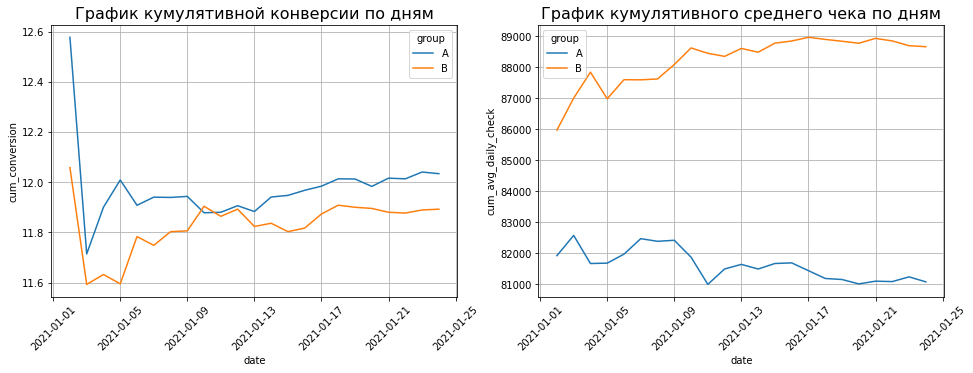

In [152]:
# ваш код здесь
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
# строим lineplot для кумулятивной конверсии во времени в каждой группе
line1 = sns.lineplot(x='date', y='cum_conversion', data=summary_daily_data, hue='group', ax=axes[0])
# строим lineplot для кумулятивного среднего чека во времени в каждой группе
line2 = sns.lineplot(x='date', y='cum_avg_daily_check', data=summary_daily_data, hue='group', ax=axes[1])
# задаём подпись к графику
line1.set_title('График кумулятивной конверсии по дням', fontsize=16)
line2.set_title('График кумулятивного среднего чека по дням', fontsize=16)
# задаём поворот меток на оси абсцисс
line1.xaxis.set_tick_params(rotation = 45)
line2.xaxis.set_tick_params(rotation = 45)
# задаём отображение сетки
line1.grid(True);
line2.grid(True);

A/B-тест можно считать завершённым — значения метрик стабилизировались во времени. Кумулятивная конверсия группы А превышает показатель группы B. При этом кумулятивный средний чек в группе A меньше аналогичного показателя в группе B.

## **Задание 7.10.**

Настало время переходить к проверке статистической значимости разницы между метриками в группах. Начнем с конверсии.

Какой тест вы примените для проверки гипотезы о равенстве конверсий в группах?

Проведите тестирование при следующих нулевой и альтернативной гипотезе:
* $H_0$: Конверсии в группах А и B равны; 
* $H_1$: Конверсия в группе А больше чем конверсия в группе B;

Вычислите p-value вашего теста для конверсий в группах А и B. Сравните полученное значение p-value с уровнем значимости $\alpha$=0.05. 

In [161]:
# ваш код здесь
# нулевая и альтернативная гипотезы
H0 = 'Конверсии в группах А и B равны'
H1 = 'Конверсия в группе А больше, чем конверсия в группе B'
alpha = 0.05 # уровень значимости
# готовим сводную табличку
purchase_piv = updated_data.groupby('group')['purchase'].agg(
    ['sum', 'count']
)
# вычисляем значение p-value для z-теста для пропорций
_, p_value = proportions_ztest(
    count=purchase_piv['sum'], #число "успехов"
    nobs=purchase_piv['count'], #общее число наблюдений
    alternative='larger',
)
# выводим результат на экран
print('p-value: ', round(p_value, 2))
# сравниваем полученное p-value с уровнем значимости
if (p_value < alpha): 
    print("Отвергаем нулевую гипотезу. {}".format(H0))
    print("Альтернативная гипотеза. H1: {}".format(H1))
else:
    print("Принимаем нулевую гипотезу. {}".format(H0))

p-value:  0.12
Принимаем нулевую гипотезу. Конверсии в группах А и B равны


Приведите свои выводы по результатам проведенного статистического теста. Есть ли статистическая разница между конверсиями в группах А и B?

Статистической разницы между конверсиями в группах нет.

## **Задание 7.11.**
Убедитесь в своих рассуждениях, построив 95%-ый доверительный интервал для конверсий и разницы между ними. Используйте $z_{крит}$ в своих расчетах

Укажите нижнюю и верхнюю границы доверительных интервалов. Границы приведите в процентах и округлите до 2 знака после запятой. Например: нижняя граница 89.24%, верхняя граница 91.25%.

In [163]:
#фильтруем данные группы А
a_data = updated_data[updated_data['group'] == 'A']
#фильтруем данные группы B
b_data = updated_data[updated_data['group'] == 'B']

In [164]:
def proportions_conf_interval(n, x_p, gamma=0.95):   
    alpha = 1 - gamma # уровень значимости
    z_crit = -norm.ppf(alpha/2) # z критическое
    eps = z_crit * (x_p * (1 - x_p) / n) ** 0.5 #погрешность
    lower_bound = x_p - eps # левая (нижняя) граница
    upper_bound = x_p + eps # правая (верхняя) граница
    # возвращаем кортеж из округлённых границ интервала
    return round(lower_bound * 100, 2), round(upper_bound * 100, 2)

In [165]:
conf_interval_a = proportions_conf_interval(
n=a_data['user_id'].count(), # размер выборки
x_p=a_data['purchase'].mean() # выборочная пропорция
)
conf_interval_b = proportions_conf_interval(
n=b_data['user_id'].count(), # размер выборки
x_p=b_data['purchase'].mean() # выборочная пропорция
)
print('Доверительный интервал для конверсии группы А: {}'.format(conf_interval_a))
print('Доверительный интервал для конверсии группы B: {}'.format(conf_interval_b))

Доверительный интервал для конверсии группы А: (11.87, 12.2)
Доверительный интервал для конверсии группы B: (11.73, 12.06)


In [166]:
def diff_proportions_conf_interval(n, xp, gamma=0.95):
    alpha = 1 - gamma # уровень значимости
    diff = xp[1] - xp[0] # выборочная разница конверсий групп B и A
    z_crit = -norm.ppf(alpha/2) # z критическое
    eps = z_crit * (xp[0] * (1 - xp[0])/n[0] + xp[1] * (1 - xp[1])/n[1]) ** 0.5 # погрешность
    lower_bound = diff - eps # левая (нижняя) граница
    upper_bound = diff + eps # правая (верхняя) граница
    # возвращаем кортеж из округлённых границ интервала
    return round(lower_bound *100, 2), round(upper_bound * 100, 2)

In [167]:
# размеры выборок групп А и B
n = [a_data['user_id'].count(), b_data['user_id'].count()]
# выборочная пропорция групп A и B
xp = [a_data['purchase'].mean(), b_data['purchase'].mean()]
# строим доверительный интервал для разности конверсий
diff_inverval = diff_proportions_conf_interval(n, xp)
print('Доверительный интервал для разности конверсий: {}'.format(diff_inverval))

Доверительный интервал для разности конверсий: (-0.38, 0.09)


Проинтерпретируйте построенные доверительные интервалы для конверсий в группах. Есть ли перекрытие между доверительными интервалами для групп? Есть ли статистическая разница между конверсиями в группах А и B?

Полученные интервалы имеют перекрытие. Левая граница доверительного интервала для разности конверсий отрицательная, правая граница - положительная. Все это подтверждает ранее полученное утверждение об отсутствии статистической разницы между конверсиями в группах А и В.

## **Задание 7.12.**

Ранее мы построили таблицу с ежедневными показателями. Теперь она нам снова понадобится, так как нас интересует ежедневный средний чек.

Проверьте гипотезу о нормальности распределения ежедневного среднего чека в каждой из групп тестирования. 

* Какой тест вы примените  для проверки гипотезы о нормальности распределения ежедневного среднего чека?
* Как будут звучать нулевая и альтернативная гипотезы?
* Каковы результаты статистического теста с уровнем значимости $\alpha$ =0.05?

In [180]:
# фильтруем данные для группы А
a_data = summary_daily_data[summary_daily_data['group'] == 'A']
# фильтруем данные для группы B
b_data = summary_daily_data[summary_daily_data['group'] == 'B']

In [181]:
# ваш код здесь
# проверяем данные на нормальность методом Шапиро-Уилка
# определяем нулевую и альтернативную гипотезы
H0 = 'Данные распределены нормально'
Ha = 'Данные не распределены нормально (мы отвергаем H0)'
alpha = 0.05 # уровень значимости
# определяем для группы A
_, p = shapiro(a_data['avg_daily_check'])
print('Группа А. p=%.3f' % p)
# Интерпретация 
if p > alpha:
	print(H0)
else:
	print(Ha)

# определяем для группы B 
_, p = shapiro(b_data['avg_daily_check'])
print('Группа B. p=%.3f' % p)
# Интерпретация 
if p > alpha:
	print(H0)
else:
	print(Ha)

Группа А. p=0.253
Данные распределены нормально
Группа B. p=0.094
Данные распределены нормально


## **Задание 7.13.**
Настало время сравнить варианты дизайна страницы по метрике среднего чека. 

Какой тест вы примените для проверки гипотезы о равенстве средних чеков по дням в группах?

Проведите тестирование при следующих нулевой и альтернативной гипотезе:
* $H_0$: Ежедневные средние чеки в группах А и B равны; 
* $H_1$: Ежедневный средний чек в группе А меньше чем в группе B;

Вычислите p-value вашего теста для ежедневного среднего чека в группах А и B. Сравните полученное значение p-value с уровнем значимости $\alpha$ =0.05. 

In [183]:
# ваш код здесь
# нулевая и альтернативная гипотезы
H0 = 'Ежедневные средние чеки в группах А и B равны'
H1 = 'Ежедневный средний чек в группе А меньше чем в группе B'
alpha = 0.05 #уровень значимости
#вычисляем результат T-теста для выборок
results = ttest_ind(
    a=a_data['avg_daily_check'],
    b=b_data['avg_daily_check'], 
    alternative='less'
)
print('p-value:', round(results.pvalue, 2))
 
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу.")
    print("Альтернативная гипотеза. H1: {}".format(H1))
else:
    print("Принимаем нулевую гипотезу. {}".format(H0))

p-value: 0.0
Отвергаем нулевую гипотезу.
Альтернативная гипотеза. H1: Ежедневный средний чек в группе А меньше чем в группе B


 Приведите свои выводы по проведенному статистическому тесту. Есть ли статистическая разница между ежедневными средними чеками в группах А и B?

Статистическая разница между ежедневными средними чеками в группах А и B доказана. Ежедневный средний чек в группе А значимо меньше чем в группе B.

## **Задание 7.14.**

Постройте 95%-ый доверительный интервал для среднего чека в каждой группе. Так как выборка средних чеков небольшая, используйте  $t_{крит}$ в своих расчетах.

Укажите нижнюю границу доверительного интервала для истинного среднего чека каждой из групп. Ответ приведите в процентах и округлите до целого.

In [187]:
a_data['avg_daily_check'].mean()

80969.2850990052

In [188]:
# ваш код здесь
n = a_data.shape[0] # размер выборки
k = n - 1 # число степеней свободы
x_mean = a_data['avg_daily_check'].mean() # выборочное среднее
x_std = a_data['avg_daily_check'].std() # выборочное стандартное отклонение
gamma = 0.95 # уровень надёжности
alpha = 1 - gamma # уровень значимости
t_crit = -t.ppf(alpha/2, k) # t-критическое
eps = t_crit * x_std/(n ** 0.5) # погрешность
lower_bound = x_mean - eps # левая (нижняя) граница
upper_bound = x_mean + eps # правая (верхняя) граница
confidence_interval = (round(lower_bound), round(upper_bound)) # создаём кортеж из округлённых границ интервала
print('Группа А. Доверительный интервал для среднего чека: {}'.format(confidence_interval)) # выводим результат

Доверительный интервал: (79630, 82308)


In [189]:
# ваш код здесь
n = a_data.shape[0] # размер выборки
k = n - 1 # число степеней свободы
x_mean = b_data['avg_daily_check'].mean() # выборочное среднее
x_std = b_data['avg_daily_check'].std() # выборочное стандартное отклонение
gamma = 0.95 # уровень надёжности
alpha = 1 - gamma # уровень значимости
t_crit = -t.ppf(alpha/2, k) # t-критическое
eps = t_crit * x_std/(n ** 0.5) # погрешность
lower_bound = x_mean - eps # левая (нижняя) граница
upper_bound = x_mean + eps # правая (верхняя) граница
confidence_interval = (round(lower_bound), round(upper_bound)) # создаём кортеж из округлённых границ интервала
print('Группа B. Доверительный интервал для среднего чека: {}'.format(confidence_interval)) # выводим результат

Группа B. Доверительный интервал для среднего чека: (87626, 89526)


Проинтерпретируйте построенные доверительные интервалы для ежедневных средних чеков в группах. Есть ли между ними пересечения?

Интервалы не имеют пересечения. Статистическая разница ежедневных средних чеков в группах подтверждена.

## **Сделайте общий вывод по результатам A/B-теста**

Какой варианта дизайна посадочной страницы является более эффективным в комплексе по метрикам конверсии и среднего чека и почему? 

Вывод: Новый дизайн посадочной страницы является более эффективным, чем старый. Новый вариант заметно лучше по метрике среднего чека, при этом он не оказывает значимого эффекта на метрику конверсии. Рост среднего чека обусловлен тем, что клиенты, использующие новую посадочную страницу, чаще выбирают более дорогие туры в Тайланд вместо туров в Турцию. Рекомендуется принять новый дизайн в продакшен. Команде следует подумать над решением, который позволит увеличить конверсию.